AUTHOR:         
marwa Osman: marwaosman9975@gmail.com    

👉 [LinkedIn](https://www.linkedin.com/in/marwa-osman-00190b222/)

👉 [GitHub](https://github.com/marwa9975)

# Customer Churn Analysis for Telecommunications Company

![image](image.png)

## BUSINESS UNDERSTANDING 

The objective of this project is to analyze customer churn for a telecommunications company. Customer churn, or attrition, is a critical concern for most telecom companies, as retaining existing customers is often more cost-effective than acquiring new ones. The goal is to perform a comprehensive analysis to understand the factors contributing to customer churn and develop strategies to reduce it.

Key Objectives:
The primary objectives of this project are as follows:

* Predict Churn: Develop a machine learning model that accurately predicts customer churn based on historical data.
* Identify Factors: Identify the key factors or features that influence customer churn. This will provide insights into what aspects of telecommunications company's services or customer experiences need improvement.
* Take Preventive Actions: Use the model's predictions to take preventive actions, such as targeted marketing campaigns, personalized offers, or customer support interventions, to reduce churn.

## DATA UNDERSTANDING  

The data is obtained from kaggle:[Telco Customer Churn](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)

The columns include:      
``customerID``: A unique identifier for each customer.    
``gender``: The gender of the customer (categorical: 'Male' or 'Female').   
``SeniorCitizen``: Indicates whether the customer is a senior citizen (binary: 0 for 'No,' 1 for 'Yes').    
``Partner``: Indicates whether the customer has a partner (binary: 'Yes' or 'No').  
``Dependents``: Indicates whether the customer has dependents (binary: 'Yes' or 'No').  
``tenure``: The number of months the customer has stayed with the company(numeric).  
``PhoneService``: Indicates whether the customer has phone service (binary: 'Yes' or 'No').   
``MultipleLines``: Indicates whether the customer has multiple phone lines (categorical: 'No phone service,' 'No,' or 'Yes').    
``InternetService``: The type of internet service subscribed by the customer (categorical: 'DSL,' 'Fiber optic,' or 'No').   
``OnlineSecurity``: Indicates whether the customer has online security (categorical: 'No,' 'Yes,' or 'No internet service').    
``OnlineBackup``: Indicates whether the customer has online backup (categorical: 'No,' 'Yes,' or 'No internet service').  
``DeviceProtection``: Indicates whether the customer has device protection (categorical: 'No,' 'Yes,' or 'No internet service').   
``TechSupport``: Indicates whether the customer has tech support (categorical: 'No,' 'Yes,' or 'No internet service').     
``StreamingTV``: Indicates whether the customer has streaming TV (categorical: 'No,' 'Yes,' or 'No internet service').    
``StreamingMovies``: Indicates whether the customer has streaming movies (categorical: 'No,' 'Yes,' or 'No internet service').   
``Contract``: The type of contract the customer has (categorical: 'Month-to-month,' 'One year,' or 'Two year').   
``PaperlessBilling``: Indicates whether the customer prefers paperless billing (binary: 'Yes' or 'No').   
``PaymentMethod``: The payment method used by the customer (categorical: 'Electronic check,' 'Mailed check,' 'Bank transfer (automatic),' or 'Credit card (automatic)').   
``MonthlyCharges``: The amount of the customer's monthly charges (numeric).   
``TotalCharges``: The total amount the customer has been charged (numeric).    
``Churn``: The target variable indicating whether the customer has churned (binary: 'Yes' or 'No')    

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  

from scipy import stats
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve,roc_auc_score,log_loss
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import cross_val_score


c:\Users\user\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Initialize the DataUnderstanding class
class DataUnderstanding:
    def __init__(self, df):
        self.df = df
# Get the summary statistics
    def get_summary_statistics(self):
        summary_stats = self.df.describe()
        return summary_stats
# Get the count of missing values
    def get_missing_values(self):
        missing_values = self.df.isnull().sum()
        return missing_values
# Get the summary of the DataFrame   
    def get_info(self):
        info = self.df.info()
        return info
# Get the data types
    def get_dtypes(self):
        dtypes = self.df.dtypes
        return dtypes  
 # GeT Value counts   
    def get_value_counts(self):
        value_counts = {}
        for column in self.df.columns:
            value_counts[column] = self.df[column].value_counts()
        return value_counts
    

In [3]:
# load the data
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Initialize the DataUnderstanding class
du = DataUnderstanding(df)

In [5]:
du.get_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The data has 7043 entries and 21 columns

In [6]:
# Get the summary statistics
du.get_summary_statistics()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
# Get data types
du.get_dtypes()

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

## DATA PREPARATION

#### Check for missing values

In [8]:
du.get_missing_values()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

The data has no missing values

#### Convert 'TotalCharges' to Numeric 
TotalCharges' column should be numeric, but it's currently stored as an object

In [9]:
# Convert totalcharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [10]:
# confirm the data type after changing
df['TotalCharges'].dtype

dtype('float64')

#### Get value counts

In [11]:
# get value counts
du.get_value_counts()

{'customerID': 7590-VHVEG    1
 3791-LGQCY    1
 6008-NAIXK    1
 5956-YHHRX    1
 5365-LLFYV    1
              ..
 9796-MVYXX    1
 2637-FKFSY    1
 1552-AAGRX    1
 4304-TSPVK    1
 3186-AJIEK    1
 Name: customerID, Length: 7043, dtype: int64,
 'gender': Male      3555
 Female    3488
 Name: gender, dtype: int64,
 'SeniorCitizen': 0    5901
 1    1142
 Name: SeniorCitizen, dtype: int64,
 'Partner': No     3641
 Yes    3402
 Name: Partner, dtype: int64,
 'Dependents': No     4933
 Yes    2110
 Name: Dependents, dtype: int64,
 'tenure': 1     613
 72    362
 2     238
 3     200
 4     176
      ... 
 28     57
 39     56
 44     51
 36     50
 0      11
 Name: tenure, Length: 73, dtype: int64,
 'PhoneService': Yes    6361
 No      682
 Name: PhoneService, dtype: int64,
 'MultipleLines': No                  3390
 Yes                 2971
 No phone service     682
 Name: MultipleLines, dtype: int64,
 'InternetService': Fiber optic    3096
 DSL            2421
 No             1526
 Nam

#### Check for duplicates  
CustomerID will be used here since it is a unique identifier

In [12]:
# check for duplicates 
df.duplicated(subset='customerID').sum()

0

There is no duplicates

#### Dropping unnecessary columns 
CustomerID will not help in the prediction of the customers who are likely to churn.it is just used as a unique identifier

In [13]:
def drop_columns(df, columns, inplace=True):
    if inplace:
        df.drop(columns=columns, inplace=True)
    else:
        return df.drop(columns=columns)

drop_columns(df, 'customerID')


#### Detecting outliers and removing outliers

In [14]:
# Set the plot style to a dark theme
plt.style.use('dark_background')

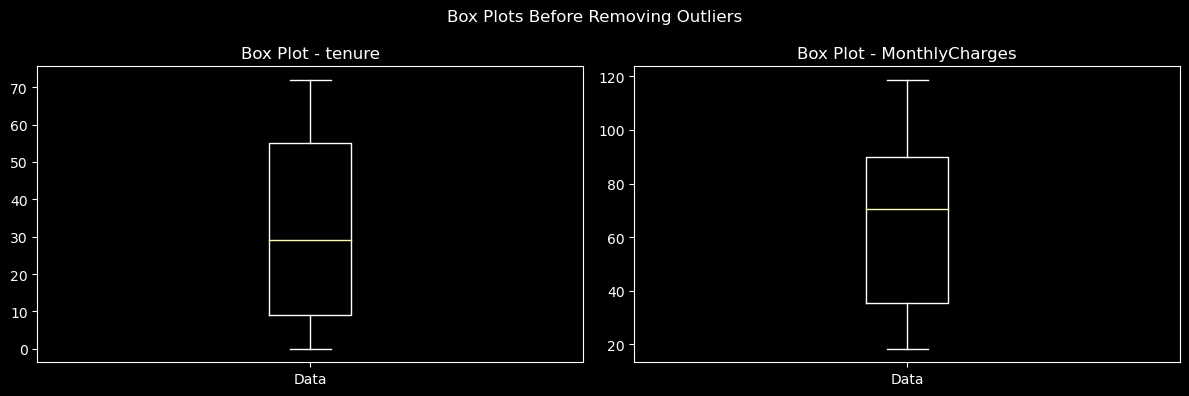

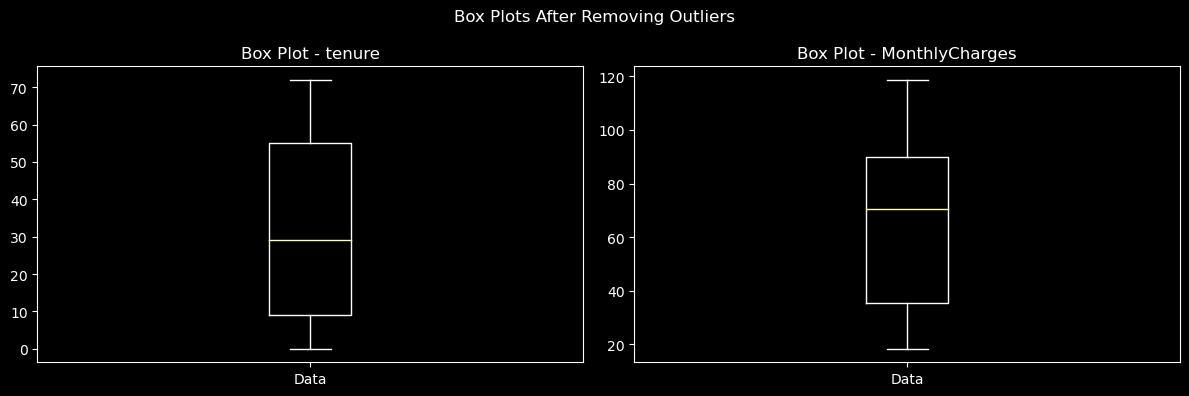

In [15]:
# plot
def plot_boxplots(data, column_names, title):
    plt.figure(figsize=(12, 4))
    for i, column in enumerate(column_names, 1):
        plt.subplot(1, len(column_names), i)
        plt.boxplot(data[column])
        plt.title(f'Box Plot - {column}')
        plt.xticks([1], ['Data'])

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

numeric_columns = ['tenure', 'MonthlyCharges']

# Plot box plots before removing outliers
plot_boxplots(df, numeric_columns, 'Box Plots Before Removing Outliers')

def remove_outliers_iqr(df, column_names):
    outliers_removed = df.copy()
    for column in column_names:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Detect and remove outliers
        outliers_removed = outliers_removed[(outliers_removed[column] >= lower_bound) &
                                              (outliers_removed[column] <= upper_bound)]

    return outliers_removed

# Detect and remove outliers
df = remove_outliers_iqr(df, numeric_columns)

# Plot box plots after removing outliers
plot_boxplots(df, numeric_columns, 'Box Plots After Removing Outliers')


## EXPLORATORY DATA ANALYSIS

### Univariate Analysis

This is analysis of one attribute

#### churn rate   
The dependent variable is the 'Churn' column, which represents whether a customer is likely to churn or not. It is the variable we want to predict. The independent variable(s) are the predictors used to predict the dependent variable

In [16]:
# count of churn rate
df['Churn'].value_counts(normalize=True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

The distribution of the two classes in the data set is not equal. This causes data imbalance. Data imbalance can cause a model to make false predictions, so it is important to address this issue before modeling.

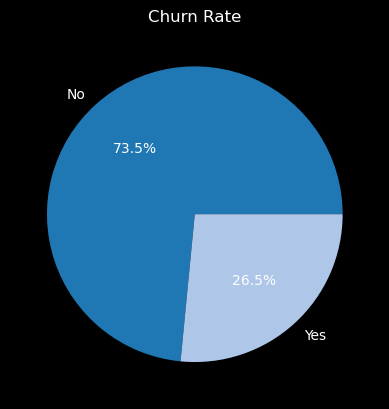

In [17]:
#plotting churn rate
def plot_churn_rate(data):
    # Define shades of blue
    colors = ['#1f77b4', '#aec7e8']

    # Create a figure
    fig, ax = plt.subplots()

    # Plot the churn rate
    ax.pie(data.value_counts(), labels=data.value_counts().index, autopct='%1.1f%%', colors=colors)

    # Add a title
    ax.set_title('Churn Rate')

    # Show the plot
    plt.show()

# Call the function with the Churn column
plot_churn_rate(df['Churn'])  

The pie chart shows that the majority of customers (73.45) did not churn, while a small minority of customers (26.5%) did churn.

#### Histogram of tenure

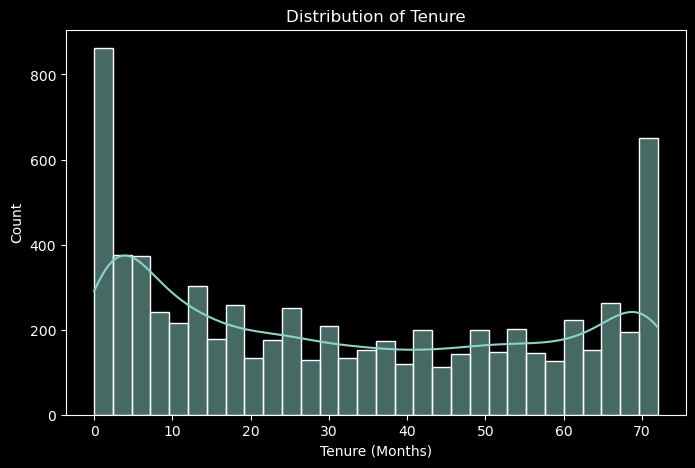

In [18]:
# Plot a histogram of tenure
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='tenure', bins=30, kde=True)
plt.title('Distribution of Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Count')
plt.show()


* The histogram shows a peak at the left side, indicating a significant number of customers with short tenure, particularly within the first few months. This suggests that the company acquires many new customers.
* Tenure: Most customers have relatively short tenure with the company, with a peak around 1-2 months 
*  Given the concentration of customers with short tenure, it's important to note that churn may be higher in this group

To prevent churn consider:
* Focusing on improving the onboarding experience for new customers by ensure that they receive adequate support, information, and guidance during the early stages of their tenure can reduce the likelihood of early churn
* Monitoring customer satisfaction and gathering  feedback, especially from customers with short tenure can help  Identify and address any common issues or pain points that might be causing churn

### Bivariate analysis

#### churn vs. Tenure

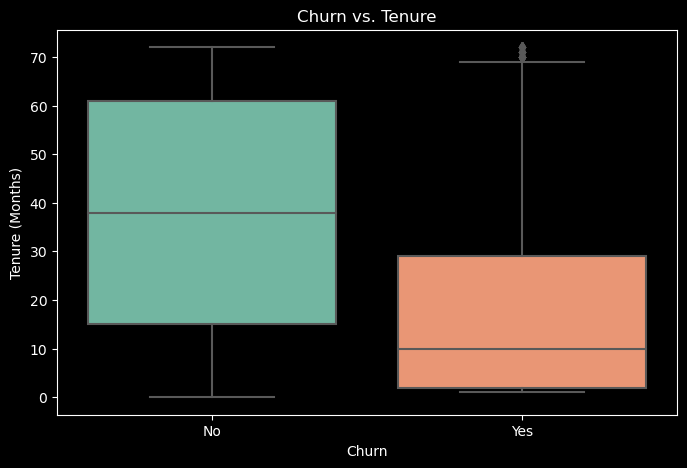

In [19]:
# Bivariate analysis for churn vs. Tenure
# plot
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Churn', y='tenure', palette='Set2')
plt.title('Churn vs. Tenure')
plt.xlabel('Churn')
plt.ylabel('Tenure (Months)')
plt.show()


* Churn vs. Tenure Distribution: The box plot illustrates the distribution of tenure (in months) for both churned (Churn = Yes) and non-churned (Churn = No) customers.
* Churned customers (Churn = Yes) tend to have shorter tenure on average. The median tenure for churned customers is notably lower compared to non-churned customers
* The median tenure for non-churned customers is higher, suggesting that the longer customers stay with the company, the less likely they are to churn
* The analysis suggests that tenure plays a significant role in predicting customer churn. Customers with shorter tenures are at a higher risk of churning, while long-term customers are more likely to remain loyal. This insight can be used to develop targeted retention strategies for newer customers and reward programs for loyal, long-term subscribers

#### Churn vs. Monthly Charges

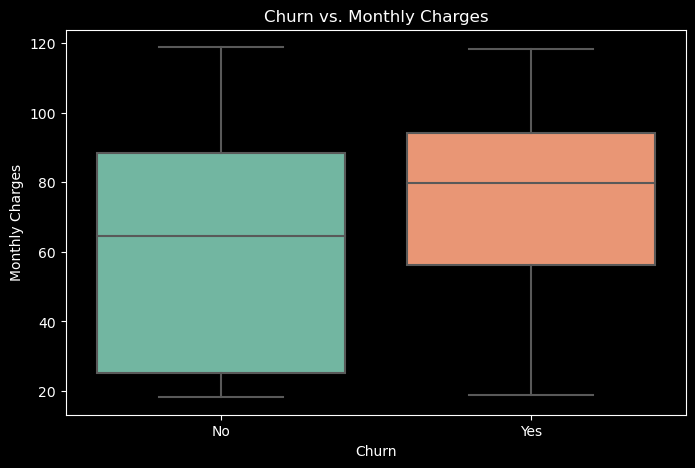

In [20]:
# plot
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette='Set2')
plt.title('Churn vs. Monthly Charges')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

* Churned customers (Churn = Yes) tend to have slightly higher median monthly charges compared to non-churned customers. This suggests that customers with higher monthly charges are more likely to churn
* Non-churned customers (Churn = No) generally have lower median monthly charges. This implies that customers with lower monthly charges are more likely to stay with the company  

To prevent churn consider:  
* Pricing Strategies: Consider evaluating and potentially adjusting pricing strategies for customers with higher monthly charges who are more likely to churn. This could involve offering discounts, special promotions, or more cost-effective plans.
* Monitoring and Retention: Keep a close eye on customers with high monthly charges, especially those showing early signs of churn. Implement proactive retention strategies such as personalized offers, excellent customer support, and loyalty programs.

### Churn by Internet Service Type

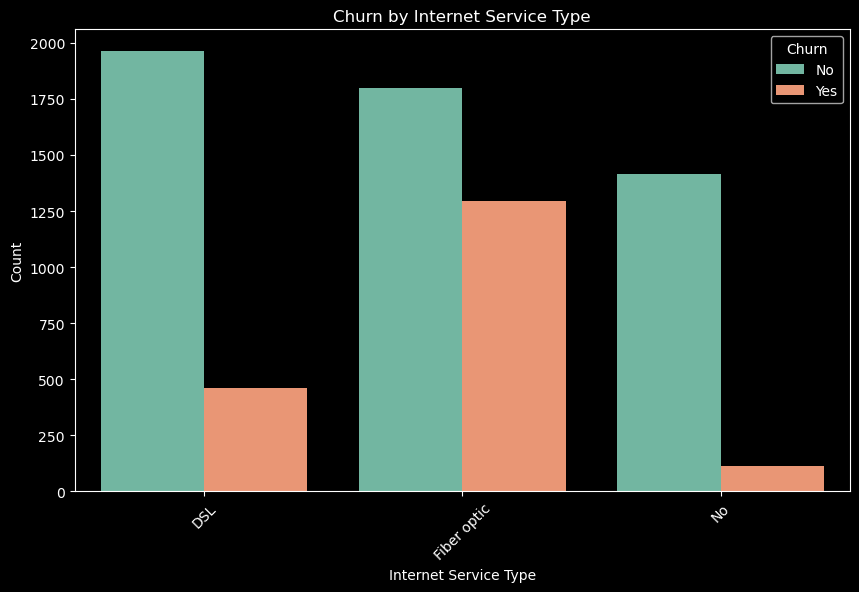

In [21]:
# Bivariate analysis for churn vs. InternetService and other services
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='InternetService', hue='Churn', palette='Set2')
plt.title('Churn by Internet Service Type')
plt.xlabel('Internet Service Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Churn', loc='upper right', labels=['No', 'Yes'])
plt.show()


* Fiber Optic Service: Customers with Fiber Optic internet service are more likely to churn (Churn = Yes) compared to DSL and No internet service users. Fiber Optic service shows a higher proportion of churned customers.     

To prevent churn consider:
* Service Quality Improvement: Consider assessing and improving the quality of Fiber Optic service, as it has the highest churn rate. Identifying and addressing the pain points associated with this service could help retain more customers
* DSL Service Promotion: Promote DSL internet service to customers who are more price-sensitive and looking for a reliable connection. Offer competitive pricing and service bundles to attract and retain these customers.
* Retention Strategies: Implement targeted retention strategies for Fiber Optic service users to reduce churn. This may include providing better customer support, addressing service issues promptly, and offering incentives to loyal customers.


#### Churn by Contract Type

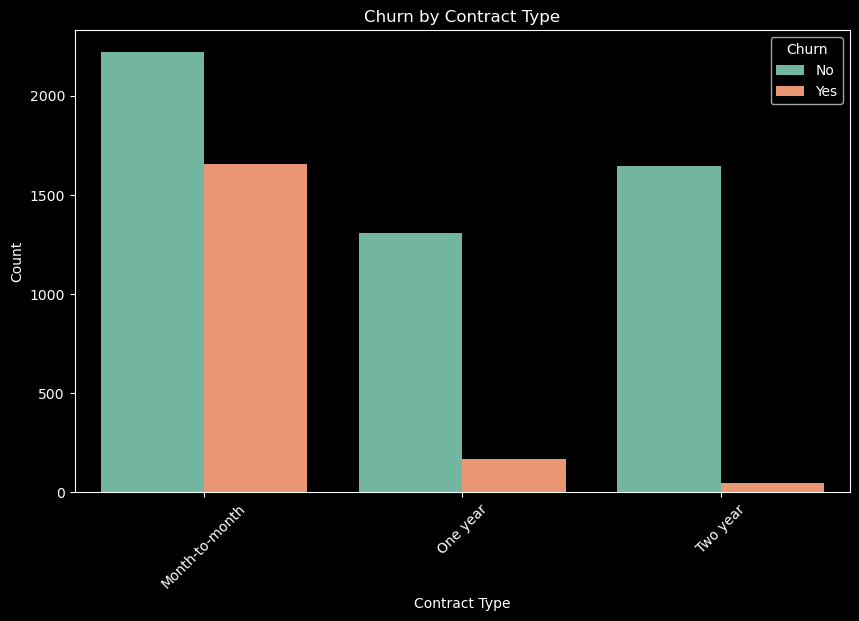

In [22]:
# Bivariate analysis for churn vs. Contract and PaymentMethod
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Contract', hue='Churn', palette='Set2')
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Churn', loc='upper right', labels=['No', 'Yes'])
plt.show()

* Customers with month-to-month contracts are more likely to churn (Churn = Yes) compared to those with one-year or two-year contracts. Month-to-month contracts have a higher proportion of churned customers.
* Customers with two-year contracts have the lowest churn rate (Churn = Yes) among the three categories  

To prevent churn consider: 

* Contract Promotion: Encourage customers to opt for longer-term contracts (one-year or two-year) by offering incentives such as discounted rates or special offers. This can help reduce churn and increase customer loyalty.
* Retention Strategies: Implement targeted retention strategies for month-to-month contract customers, as they have the highest churn rate. Provide personalized offers, excellent customer support, and additional benefits to retain these customers.
* Customer Communication: Maintain regular communication with customers on month-to-month contracts to keep them engaged and informed about the benefits of switching to longer-term contracts.

#### Churn by Payment Method

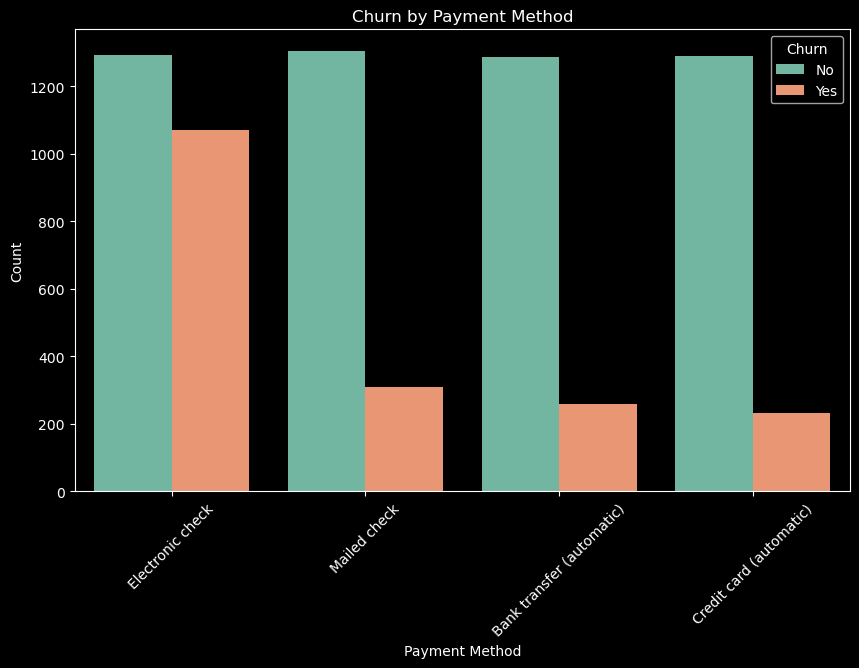

In [23]:
# plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='PaymentMethod', hue='Churn', palette='Set2')
plt.title('Churn by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Churn', loc='upper right', labels=['No', 'Yes'])
plt.show()

* Customers using electronic check as their payment method tend to have a higher churn rate compared to other payment methods. This suggests that there may be issues or inconveniences associated with electronic check payments that are driving customers to churn. It's advisable to investigate and address these concerns, such as streamlining the payment process or offering alternatives.

To prevent churn 
* focus on addressing any pain points related to electronic check payments. Additionally, consider promoting and encouraging the use of bank transfer and credit card payment methods, as they appear to be associated with lower churn rates
* Providing clear communication and support for payment processes can also contribute to improved customer retention.

### Multivariate Analysis

#### Correlation Heatmap   
correlation heatmap helps identify relationships between numerical variables

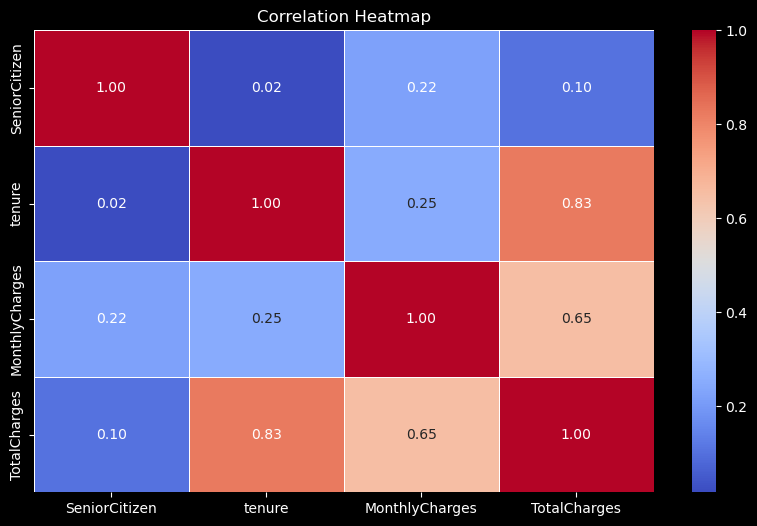

In [24]:
# plot correlation heat map
plt.figure(figsize=(10, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


* Strong Positive Correlation:  
There is a strong positive correlation (0.83) between TotalCharges and tenure. This suggests that as customers stay with the company for a longer duration (tenure), their TotalCharges tend to increase. Encouraging longer customer loyalty may lead to higher total charges.
* Weak Correlation:   
There is a weak negative correlation (-0.25) between MonthlyCharges and tenure. This indicates that while there is some relationship, it is not very strong. Customers with longer tenure do not necessarily have significantly lower or higher monthly charges.  
* Tenure and Total charges are highly correlated this Indicate multicollinearity. 

To prevent churn consider:
* Encourage customer loyalty by offering incentives for longer tenure to increase TotalCharges.
* consider special offers for long-term customers if high monthly charges are contributing to churn..

#### Pairplot of Numerical Variables by Churn

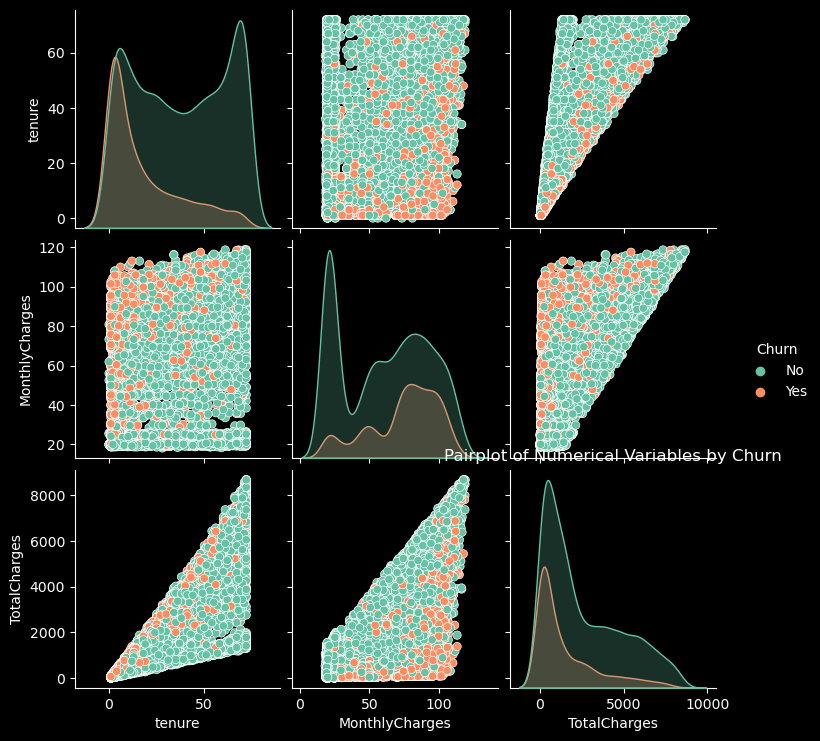

In [25]:
# plot
sns.pairplot(df, hue='Churn', vars=['tenure', 'MonthlyCharges', 'TotalCharges'], palette='Set2')
plt.title('Pairplot of Numerical Variables by Churn')
plt.show()

* Tenure vs. Monthly Charges: Customers with lower tenures and higher monthly charges are more likely to churn (Churn = Yes), indicating that new customers with higher costs may be prone to churn.
* Tenure vs. Total Charges: Longer-tenured customers tend to have higher total charges.
* Monthly Charges vs. Total Charges: The relationship between monthly and total charges is linear.
* Churn vs. Tenure/Monthly Charges/Total Charges: Churned customers are concentrated in the lower tenure and higher monthly charges region.

To prevent customer churn consider:

* Focus on retaining new customers: Given that customers with lower tenures and higher monthly charges are more likely to churn, consider implementing strategies to engage and retain new customers during their early stages with the company.
* Value-added services: Offer value-added services, personalized offers, or discounts to customers with higher monthly charges to encourage them to stay and perceive greater value in their subscriptions.
* Customer segmentation: Segment customers based on their tenure and monthly charges to tailor retention efforts more effectively. Create targeted campaigns and communication for specific customer groups

#### Tenure vs. Contract vs. Churn'

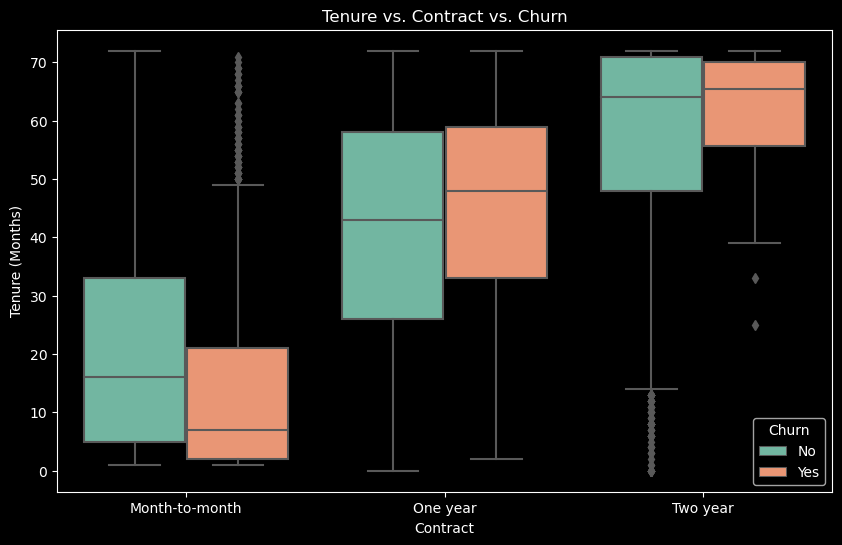

In [26]:
# plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Contract', y='tenure', hue='Churn', palette='Set2')
plt.title('Tenure vs. Contract vs. Churn')
plt.xlabel('Contract')
plt.ylabel('Tenure (Months)')
plt.show()


* Customers with month-to-month contracts who churn (Churn = Yes) tend to have shorter tenures on average compared to those who do not churn (Churn = No). This suggests that customers with shorter commitments are more likely to churn in this contract category
*  Customers with two-year contracts have a significantly longer median tenure, regardless of churn status. This indicates that customers with longer-term commitments are less likely to churn.

To prevent churn consider: 
* Retention Strategies: Implement targeted retention strategies for customers with month-to-month contracts, as they have the highest likelihood of churn due to shorter tenures. Encourage them to switch to longer-term contracts.
* Promote Longer-Term Contracts: Offer incentives and promotions to encourage customers to opt for one-year or two-year contracts, which have lower churn rates.

## DATA PREPROCESSING 

#### Removing Multicollinearity

In [27]:

def drop_multicollinearity(df, threshold=0.8):

    # Calculate the correlation matrix
    corr_matrix = df.corr().abs()

    # Create a mask to identify highly correlated features
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    # Find the highly correlated features
    highly_correlated = corr_matrix.mask(mask).stack().sort_values(ascending=False)

    # Identify variables with correlation above the threshold
    correlated_vars = highly_correlated[highly_correlated > threshold].index.get_level_values(0)

    # Drop the highly correlated variables from the DataFrame
    df_dropped = df.drop(columns=correlated_vars)

    return df_dropped
df = drop_multicollinearity(df)
print("The reduced dataframe has {} columns.".format(df.shape[1]))

The reduced dataframe has 19 columns.


In [28]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'Churn'],
      dtype='object')

### Convert Churn Column  to numeric(0s and 1s)

The churn feature need to be binary encoded to be used in the classification problem

In [29]:
# values in churn before transforming
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [30]:
# Convert binary categorical columns to numeric (yes/no to 1/0)
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

In [31]:
# values in churn after transforming
df['Churn'].unique()

array([0, 1], dtype=int64)

### Assign the variables   
assigning  target variable(Churn)  to y for prediction and the rest of the Features to independebt variable X  

In [32]:
# Assign the data to X and y
y = df['Churn']
X = df.drop(columns=['Churn'], axis=1)

In [33]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70


### One-hot encode the categorical features

One-hot encoding is a technique used to transform categorical variables into a format that machine learning models can understand. It turns categories into individual binary (0 or 1) features, effectively representing each category as a unique switch that is either on (1) or off (0). This conversion is necessary to enable classification models to work with categorical data and make predictions effectively

In [34]:
# List of columns in the dataset
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 
                       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                       'Contract', 'PaperlessBilling', 'PaymentMethod']

In [35]:
# Onehotencode
ohe = OneHotEncoder(sparse=False)
X_encoded = ohe.fit_transform(X[categorical_columns])
# Retrieve feature names for the encoded columns
feature_names = []
for i, col in enumerate(categorical_columns):
    categories = ohe.categories_[i]
    for category in categories:
        feature_names.append(f"{col}_{category}")
# Create a DataFrame for the encoded features
X_encoded_df = pd.DataFrame(X_encoded, columns=feature_names)
X_encoded_df.head()

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


### Scaling the numerical features


Scaling the numerical features is a necessary preparation step before applying SMOTE (Synthetic Minority Over-sampling Technique) to handle imbalanced class distribution in the target variable. Scaling ensures that numerical features are on a similar scale, making them directly comparable. This is important because SMOTE generates synthetic samples to balance classes, and we want these synthetic samples to be consistent with the original data. Scaling prevents introducing unnecessary bias by ensuring that both original and synthetic samples are within the same scaled range. Therefore, it's advisable to scale the numerical features before using SMOTE to create a balanced dataset for modeling

In [36]:
# Define the list of numerical columns to be scaled
numerical_columns = ['tenure', 'MonthlyCharges', 'SeniorCitizen']
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical columns
scaled_data = scaler.fit_transform(df[numerical_columns])

# Create a DataFrame for the scaled numerical data
scaled_df = pd.DataFrame(data=scaled_data, columns=numerical_columns)
scaled_df.head()

,tenure,MonthlyCharges,SeniorCitizen
0,-1.277445,-1.160323,-0.439916
1,0.066327,-0.259629,-0.439916
2,-1.236724,-0.362660,-0.439916
3,0.514251,-0.746535,-0.439916
4,-1.236724,0.197365,-0.439916


In [37]:
# combine the scaled columns and onehotencoded columns
X_final = pd.concat([scaled_df, X_encoded_df, ], axis=1)
X_final.head()

,tenure,MonthlyCharges,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-1.277445,-1.160323,-0.439916,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.066327,-0.259629,-0.439916,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-1.236724,-0.362660,-0.439916,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.514251,-0.746535,-0.439916,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,-1.236724,0.197365,-0.439916,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


### Train-Test Split    
Splitting the dataset into training and testing sets is a crucial step to ensure that your machine learning models generalize well and can make accurate predictions on new, unseen data. It helps you assess the model's performance on data it hasn't seen during training, preventing overfitting and enabling you to fine-tune hyperparameters and refine features effectively


I will split the data in 80% training and 20% testing data

In [38]:
# Perform train test split using sci kit learn train_test_split
X_train , X_test, y_train, y_test = train_test_split(X_final, y, test_size =0.2, random_state=1)

### SMOTE

SMOTE is a valuable tool for addressing imbalanced class distribution in classification problems. It helps ensure that machine learning models can make accurate predictions for both minority and majority classes, making it particularly useful in applications where the consequences of misclassifying the minority class are significant

In [39]:
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

To address the imbalanced nature of the dataset, I will use SMOTE to rebalance the target variable, where Class 1 has significantly fewer samples compared to Class 0.

In [40]:
# instantiate SMOTE 
sm = SMOTE(random_state=1)
# fit sm on the training data
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)
# print training data set before over sampling
print('Before resampling, the shape of X_train: {}'.format(X_train.shape))
print('Before resampling, the shape of y_train: {}'.format(y_train.shape)) 
# print training data set after over sampling
print('After resampling, the shape of X_train_resampled: {}'.format(X_train_resampled.shape))
print('After resampling, the shape of y_train_resampled: {}'.format(y_train_resampled.shape))
y_train_resampled.value_counts()

Before resampling, the shape of X_train: (5634, 44)
Before resampling, the shape of y_train: (5634,)
After resampling, the shape of X_train_resampled: (8226, 44)
After resampling, the shape of y_train_resampled: (8226,)


0    4113
1    4113
Name: Churn, dtype: int64

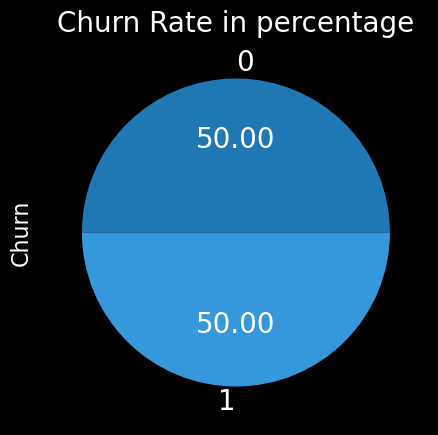

In [41]:
# pie chart showing distribution of target variable
fig, ax = plt.subplots(figsize=(10, 5))
#plot pie chart
y_train_resampled.value_counts().plot(kind='pie', autopct='%.2f', textprops={'fontsize': 20}, colors=['#1f77b4', '#3498db'], ax=ax)
# plot labels
ax.set_ylabel('Churn', fontsize=16)
ax.set_title('Churn Rate in percentage', fontsize=20);

## MODELING

### Baseline Model - Logistic Regression 

Logistic Regression is a common machine learning method for binary classification tasks, where the target variable has only two possible outcomes. In this case, our target variable "churn" has two classes, making Logistic Regression a suitable choice for predicting whether customers will churn or not.

I will  use Logistic Regression as the initial benchmark model, and compare its performance to other models later on.

In [42]:
# create the logistic Regression model
# use LogisticRegression from scikit learn
# Instantiate the model
logreg = LogisticRegression(solver='liblinear')

# Fit the model
# train the model on training data
logreg.fit(X_train_resampled, y_train_resampled)

# predict the test
y_test_pred = logreg.predict(X_test)
# Assuming you have a trained model called 'model' and test data 'X_test'
y_train_pred = logreg.predict(X_train_resampled)

#### Most important features

In [43]:
def plot_top_feature_importance(feature_importance, feature_names, top_n=10, model_name=None):
    # Sort feature importances and select the top N
    sorted_idx = np.argsort(feature_importance)[::-1][:top_n]
    pos = np.arange(sorted_idx.shape[0]) + 0.5

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(9, 6))

    # Create a horizontal bar chart
    ax.barh(pos, feature_importance[sorted_idx], align='center')
    ax.set_title(f"Top {top_n} Relative Feature Importance for {model_name}", fontsize=13, fontweight='bold')
    ax.set_yticks(pos)
    ax.set_yticklabels(np.array(feature_names)[sorted_idx], fontsize=12)

    # Adjust layout and display the chart
    plt.tight_layout()
    plt.show()

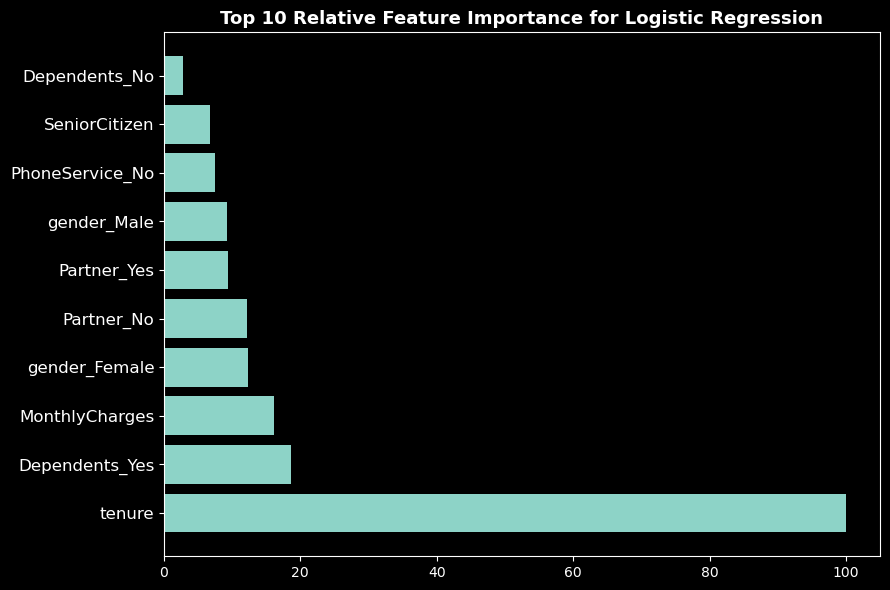

In [44]:
# Calculate the feature importances
feature_importance = abs(logreg.coef_[0])  
 # Select top 10 features
feature_importance = 100.0 * (feature_importance / feature_importance.max())[0:10] 
# Get the names of the features
feature_names = X_final.columns.tolist()
# plot
plot_top_feature_importance(feature_importance, feature_names, top_n=10, model_name='Logistic Regression')


Features that had most significant impact on Churn variable in the above model
- Tenure
- Dependents_yes
- Monthly charges

#### Baseline Model Evaluation

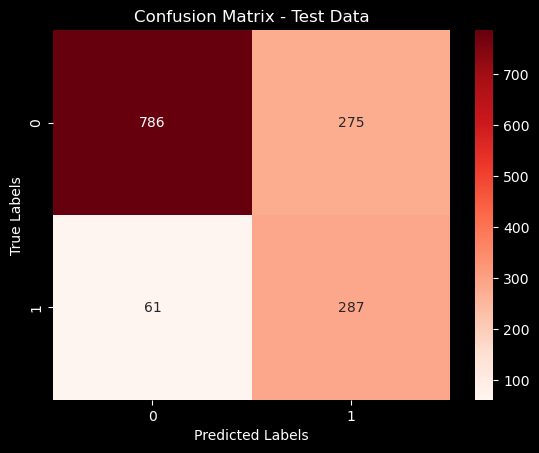

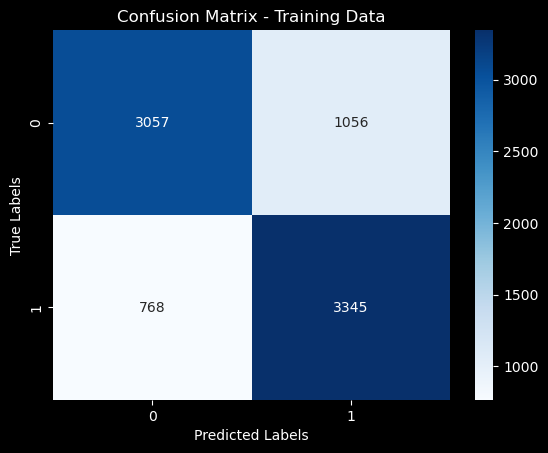

Training Data:
Accuracy: 0.7782640408460978
Precision: 0.7600545330606681
Recall: 0.8132749817651349
F1-score: 0.7857646229739252

Test Data:
Accuracy: 0.7615330021291696
Precision: 0.5106761565836299
Recall: 0.8247126436781609
F1-score: 0.6307692307692307


In [45]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Predict the labels for the training and test data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate the evaluation metrics for training data
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    train_cm = confusion_matrix(y_train, y_train_pred)

    # Calculate the evaluation metrics for test data
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    test_cm = confusion_matrix(y_test, y_test_pred)

    # Plot the confusion matrix for test data
    sns.heatmap(test_cm, annot=True, fmt="d", cmap="Reds")
    plt.title("Confusion Matrix - Test Data")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

    # Plot the confusion matrix for training data
    sns.heatmap(train_cm, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix - Training Data")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

    # Print the evaluation metrics for training data
    print("Training Data:")
    print("Accuracy:", train_accuracy)
    print("Precision:", train_precision)
    print("Recall:", train_recall)
    print("F1-score:", train_f1)

    # Print the evaluation metrics for test data
    print("\nTest Data:")
    print("Accuracy:", test_accuracy)
    print("Precision:", test_precision)
    print("Recall:", test_recall)
    print("F1-score:", test_f1)
evaluate_model(logreg, X_train_resampled, y_train_resampled, X_test, y_test)

* Training Data: The model demonstrates reasonably good performance on the training data, with high accuracy, precision, recall, and F1-score, indicating that it is learning well from the training dataset.
* Test Data: On the test data, the model still maintains decent accuracy but shows a notable drop in precision compared to the training data. The recall is relatively high, indicating that the model is effective in identifying actual churn cases, but the precision suggests room for improvement in reducing false positives  
* The baseline model performs well in terms of identifying actual churn cases but could benefit from enhancements in precision to reduce false positives when applied to new, unseen data

In [46]:
# Make predictions on the test data
y_pred_proba = logreg.predict_proba(X_test)

# Compute the log loss
logloss = log_loss(y_test, y_pred_proba)

print('Log Loss:', logloss)

Log Loss: 0.4760651656532635


a log loss of approximately 0.476 suggests that the model's predicted probabilities are reasonably well-calibrated

### Second Model- Random Forest

Random Forest is a robust and adaptable machine learning technique that's effective in tackling diverse classification challenges. It shines in scenarios with numerous features or when high accuracy is essential. This algorithm is particularly advantageous because it harnesses the collective wisdom of multiple decision trees, resulting in more precise predictions through ensemble learning.

In [47]:
# Instantiate the Random Forest model with desired hyperparameters
random_forest = RandomForestClassifier(n_estimators=100, random_state=1)  # You can adjust 'n_estimators' as needed

# Fit the Random Forest model to the resampled training data
random_forest.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_test_pred_rf = random_forest.predict(X_test)

# Make predictions on the training data (for reference or evaluation)
y_train_pred_rf = random_forest.predict(X_train_resampled)

#### Most important features

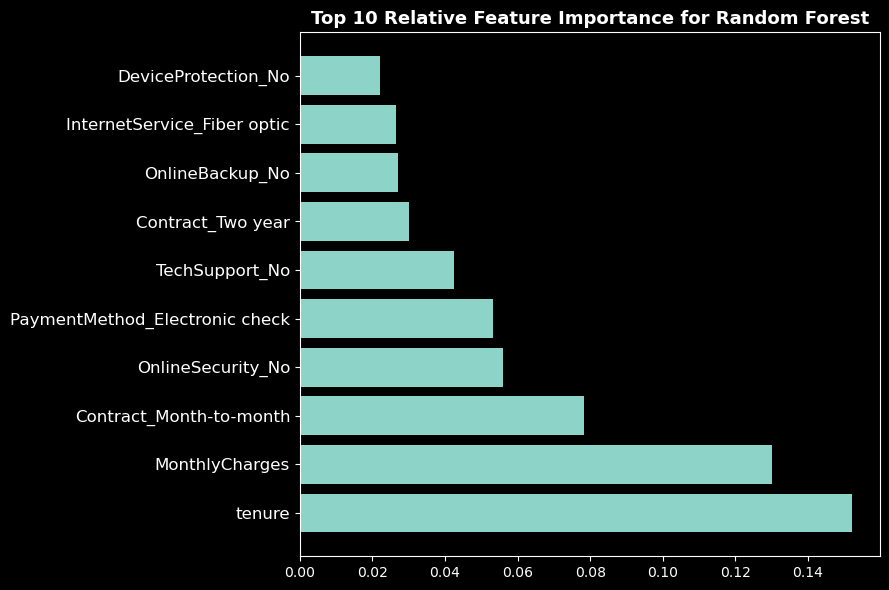

In [48]:
# Calculate the feature importances for Random Forest
feature_importance_rf = random_forest.feature_importances_

# Select top 10 features
sorted_idx_rf = np.argsort(feature_importance_rf)[::-1][:10]

# Get the names of the features
feature_names_rf = X_final.columns.tolist()

# Plot feature importances for Random Forest
plot_top_feature_importance(feature_importance_rf, feature_names_rf, top_n=10, model_name='Random Forest')


Features that had most significant impact on Churn variable in the model
- Tenure
- Monthly charges
- contract_month to month

### Random forest model evaluation

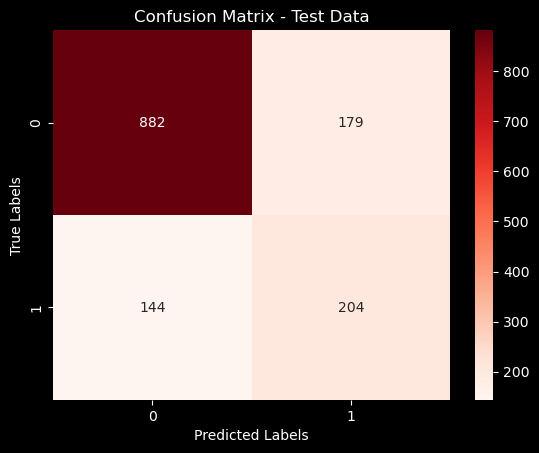

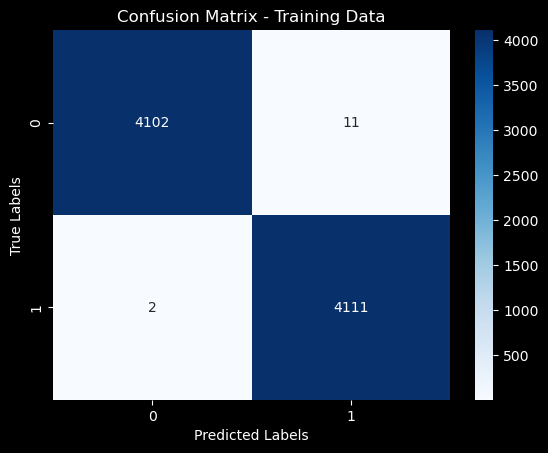

Training Data:
Accuracy: 0.9984196450279601
Precision: 0.997331392527899
Recall: 0.99951373693168
F1-score: 0.998421372191864

Test Data:
Accuracy: 0.7707594038325053
Precision: 0.5326370757180157
Recall: 0.5862068965517241
F1-score: 0.5581395348837209


In [49]:
# evaluate with the function defined in evaluation of baseline model
evaluate_model(random_forest, X_train_resampled, y_train_resampled, X_test, y_test)

* The Random Forest model demonstrates exceptional performance on the training data, achieving near-perfect scores in accuracy, precision, recall, and F1-score. This suggests that it may have overfit the training data, capturing its nuances but potentially failing to generalize well to new data   
* On the test data, the Random Forest model maintains good accuracy but shows a drop in precision compared to the baseline model. While it has high recall, indicating effectiveness in identifying actual churn cases, the drop in precision suggests a higher rate of false positives. 
* Overall, the Random Forest model excels in training data but exhibits some overfitting tendencies and a trade-off between precision and recall on the test data

In [50]:
# Make predictions on the test data
y_pred_proba2 = random_forest.predict_proba(X_test)

# Compute the log loss
logloss2 = log_loss(y_test, y_pred_proba2)

print('Log Loss:', logloss2)

Log Loss: 0.5226263449968681


* The Log Loss value of approximately 0.522 suggests that the model's predicted probabilities have a moderate level of alignment with the actual outcomes 
* in terms of Log Loss, the baseline model (Logistic Regression) performs slightly better than the Random Forest model

### Third model - K-nearest Neighbors(KNN) Model

KNN is a non-parametric machine learning algorithm that makes predictions by assessing the similarity between the new data point and the training data. It doesn't assume a specific underlying data distribution and relies on the local patterns found in the training data to classify or regress new data points.

In [51]:
# Create an instance of KNeighborsClassifier
knn = KNeighborsClassifier()

# Fit the classifier to the training data
knn.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_test_pred = knn.predict(X_test)
y_train_pred = knn.predict(X_train_resampled)

#### KNN evaluation

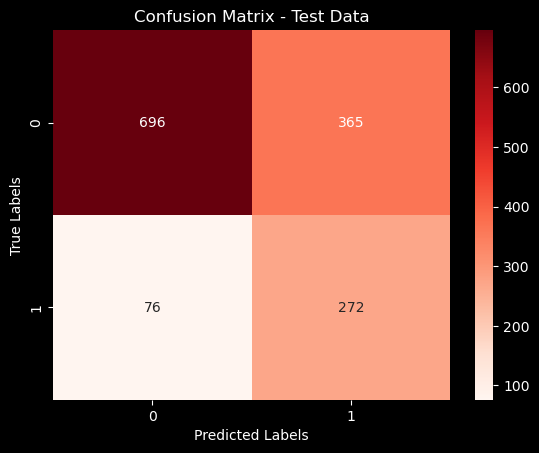

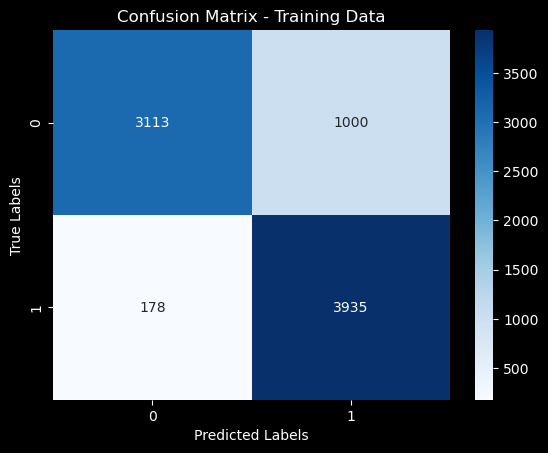

Training Data:
Accuracy: 0.8567955263797714
Precision: 0.7973657548125633
Recall: 0.9567225869195235
F1-score: 0.8698054818744474

Test Data:
Accuracy: 0.6870120652945352
Precision: 0.42700156985871274
Recall: 0.7816091954022989
F1-score: 0.5522842639593909


In [52]:
evaluate_model(knn, X_train_resampled, y_train_resampled, X_test, y_test)    

* The model demonstrates strong performance on the training data with high accuracy (approximately 85.9%), precision (approximately 79.9%), and recall (approximately 95.8%). However, on the test data, it exhibits lower accuracy (approximately 68.6%), precision (approximately 42.6%), and F1-score (approximately 55.1%), suggesting room for improvement in generalization to unseen data.
* Knn model outperforms the baseline model in terms of training accuracy, precision, and recall. However, it performs slightly worse in terms of test accuracy and F1-score

In [53]:
# Make predictions on the test data
y_pred_proba3 = knn.predict_proba(X_test)

# Compute the log loss
logloss3 = log_loss(y_test, y_pred_proba3)

print('Log Loss:', logloss3)

Log Loss: 2.8981807066149883


The Log Loss value of approximately 2.89 suggests that the model's predicted probabilities have a very high level of uncertainty and do not align well with the actual outcomes

### Model comparison 
####  Utilizing the ROC Curve
The ROC (Receiver Operating Characteristic) curve serves as a visual tool to assess the effectiveness of a classification model. It showcases how the model balances true positive rate (also known as sensitivity or recall) against the false positive rate (which is essentially 1 - specificity).

The ROC curve and its accompanying AUC (Area Under the Curve) measurement are valuable resources for appraising and contrasting the capabilities of classification models

Logistic Regression ROC AUC: 0.8571


Random Forest ROC AUC: 0.8206
KNN ROC AUC: 0.7815


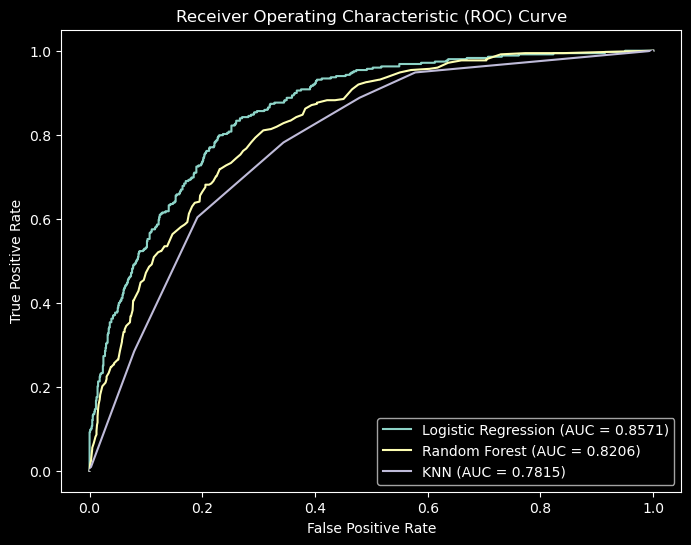

In [54]:

# models
models = [logreg, random_forest, knn]
model_names = ['Logistic Regression', 'Random Forest','KNN']
# plot
plt.figure(figsize=(8, 6))

for model, name in zip(models, model_names):
    # Fit the model on training data
    model.fit(X_train_resampled, y_train_resampled)

    # Predict probabilities for positive class
    y_proba = model.predict_proba(X_test)[:, 1]

    # Calculate false positive rate and true positive rate
    fpr, tpr, _ = roc_curve(y_test, y_proba)

    # Calculate AUC score
    auc_score = roc_auc_score(y_test, y_proba)
    # Print ROC AUC score
    print(f'{name} ROC AUC: {auc_score:.4f}')

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.4f})')

# Plot diagonal line representing random guessing
plt.plot([0, 1], [0, 1], 'k--')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

# Show legend
plt.legend(loc='lower right')

# Show the plot
plt.show()


* Logistic Regression (ROC AUC: 0.85): This model achieved the highest ROC AUC score, approximately 0.85, indicating strong discriminative power in distinguishing between churn and non-churn customers.
* Random Forest (ROC AUC: 0.82): he Random Forest model, while slightly behind Logistic Regression with an ROC AUC score of approximately 0.82, still demonstrates excellent performance in classifying churn
* K-nearest Neighbors (KNN) (ROC AUC: 0.78): Respectable but not optimal.However, it suggests that KNN might not be the best choice for this specific classification problem in its current configuration.
* Logistic Regression is the top performer, followed by Random Forest.

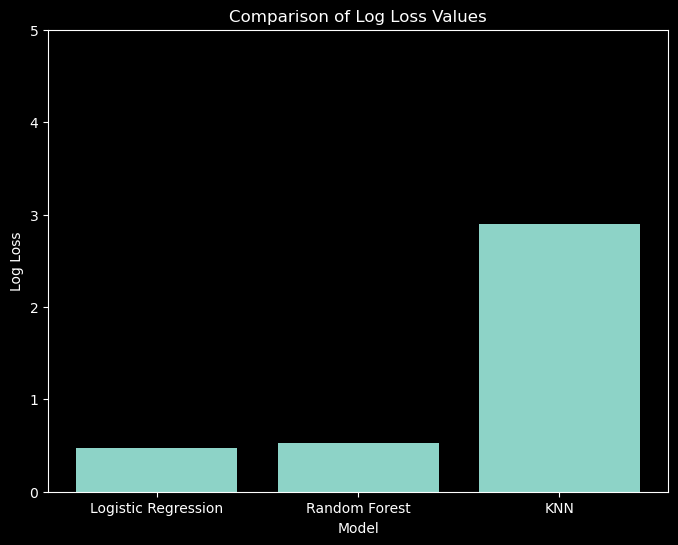

In [55]:
# Create a DataFrame to store the log loss values
logloss_data = {'Model': ['Logistic Regression', 'Random Forest', 'KNN'],
                'Log Loss': [0.4760651656532635, 0.5226263449968681, 2.8981807066149883]}
logloss_df = pd.DataFrame(logloss_data)

# Plot the log loss values
plt.figure(figsize=(8, 6))
plt.bar(logloss_df['Model'], logloss_df['Log Loss'])
plt.xlabel('Model')
plt.ylabel('Log Loss')
plt.title('Comparison of Log Loss Values')

# Set y-axis limits based on the log loss values
plt.ylim(0, 5)

plt.show()

lower log loss values indicate better probability calibration and model performance. Logistic Regression demonstrates the best probability calibration, while Random Forest, while accurate, may benefit from fine-tuning its probability estimates. KNN, with its high log loss, requires significant improvements in probability calibration to match the performance of the other models

To further elevate model performance, I will conduct hyperparameter optimization for  Logistic Regression Since it is the best performing model compared to the other models

###     Fourth Model - Tuned Logistic Regression Model

The hyperparameters of the logistic regression could be further tuned to achieve the better performance  

In [56]:
# Create the pipeline for logistic regression model with increased max_iter and tol
pipe_logreg = Pipeline([('logreg', LogisticRegression(max_iter=1000 , tol=0.001))])

# Define the hyperparameter grid for tuning
param_grid = {
    'logreg__penalty': ['l1', 'l2'],
    'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'logreg__solver': ['liblinear', 'saga']
}

# Fit the grid search cross-validation
grid_search_logreg = GridSearchCV(pipe_logreg, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search_logreg.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and best score
best_params = grid_search_logreg.best_params_
best_score = grid_search_logreg.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Get the best model from the grid search
best_model = grid_search_logreg.best_estimator_


Best Parameters: {'logreg__C': 0.1, 'logreg__penalty': 'l2', 'logreg__solver': 'liblinear'}
Best Score: 0.7768073657425019


### Model Evaluation

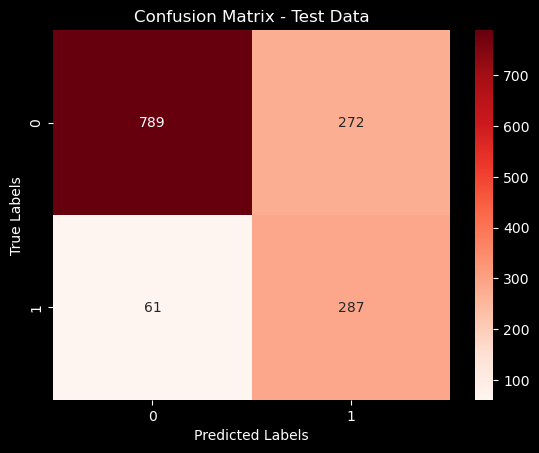

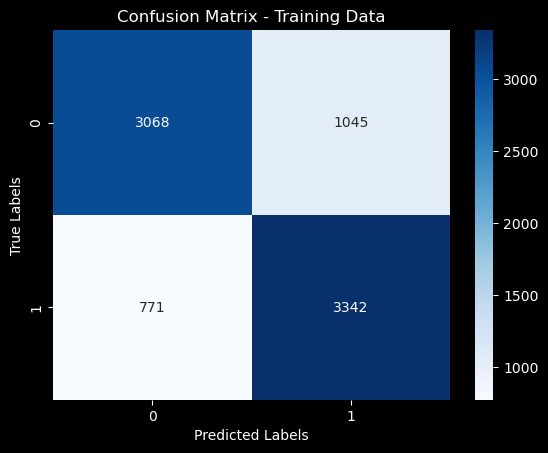

Training Data:
Accuracy: 0.7792365669827377
Precision: 0.7617962160930021
Recall: 0.812545587162655
F1-score: 0.7863529411764707

Test Data:
Accuracy: 0.7636621717530163
Precision: 0.5134168157423972
Recall: 0.8247126436781609
F1-score: 0.6328555678059538


In [57]:
# Evaluate the tuned logistic regression model
evaluate_model(best_model, X_train_resampled, y_train_resampled, X_test, y_test)

The tuned Logistic Regression model shows slight improvements in accuracy, precision, recall, and F1-score compared to the untuned model. These improvements indicate that hyperparameter tuning has enhanced the model's performance, particularly in terms of precision and F1-score

In [58]:
# Make predictions on the test data
y_pred_proba5 = best_model.predict_proba(X_test)

# Compute the log loss
logloss5 = log_loss(y_test, y_pred_proba5)

print('Log Loss:', logloss5)

Log Loss: 0.4761468727164029


The log loss values for both the untuned and tuned Logistic Regression models are extremely close, with only a slight difference. This indicates that hyperparameter tuning did not significantly impact the model's log loss performance.  c

This model however performed slightly better than the untuned model hence it will be used as the final model used for the customer churn analysis.

#### Most Important features of The Tuned Logistic Regression

           Feature  Importance
0           tenure  100.000000
1   MonthlyCharges   34.296064
8   Dependents_Yes   16.791316
3    gender_Female   10.399257
5       Partner_No    9.934395
6      Partner_Yes    7.955819
4      gender_Male    7.490956
2    SeniorCitizen    7.025448
9  PhoneService_No    4.501551
7    Dependents_No    1.098898


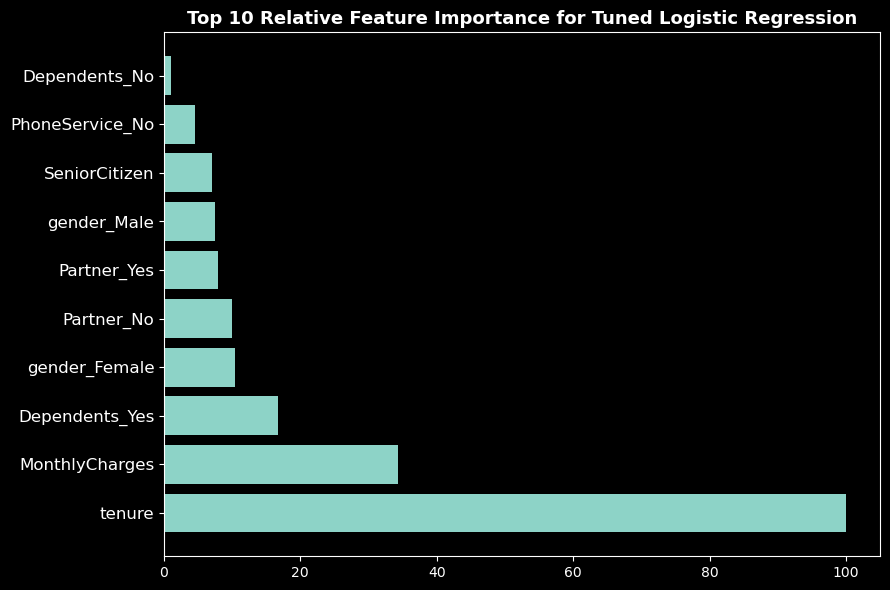

In [59]:
# Get the coefficients from the best model
feature_importance_tuned = abs(best_model.named_steps['logreg'].coef_[0])

# Normalize the feature importances
feature_importance_tuned = 100.0 * (feature_importance_tuned / feature_importance_tuned.max())

# Select top 10 features
top_n = 10
feature_importance_tuned = feature_importance_tuned[:top_n]
#Get the names of the features
feature_names = X_final.columns.tolist()
top_feature_names = feature_names[:top_n]
# Create a DataFrame with the results
result_df = pd.DataFrame({'Feature': top_feature_names, 'Importance': feature_importance_tuned})

# Sort the DataFrame by Importance (highest to lowest)
result_df = result_df.sort_values(by='Importance', ascending=False)

# Print the sorted DataFrame
print(result_df)
# call the function
plot_top_feature_importance(feature_importance_tuned, top_feature_names, top_n=top_n, model_name='Tuned Logistic Regression')

Features that had most significant impact on the target variable in the model:  

* Tenure (Months): Tenure is the most critical feature, with a feature importance score of 100. This means that the longer a customer has been with the company, the less likely they are to churn. Building long-term customer relationships is essential for reducing churn.
* Monthly Charges: Monthly charges also have a significant impact on churn, with a feature importance score of approximately 34. Customers with higher monthly charges are more likely to churn. This suggests that pricing strategies and value-added services may play a crucial role in retention efforts.
* Dependents: The presence of dependents, specifically when customers have dependents (Dependents_Yes), is an important factor in reducing churn (feature importance score of about 16.8). Customers with dependents may be more likely to stay with the company, possibly due to the stability of family services.

## RECOMMENDATIONS



The recommendation is driven from the most significant features and the Exploratory data analysis.These recommendations can help prevent customer churn 
* Offering incentives for customers to stay longer, as tenure plays a critical role.
* Evaluating and potentially adjusting pricing strategies to retain customers with higher monthly charges.
* Providing targeted offers or promotions to customers with dependents, as they are less likely to churn
* Enhance Onboarding Experience: Improve the onboarding experience for new customers to reduce early churn. Provide ample support, information, and guidance during their initial tenure.
* Gather Feedback: Continuously monitor customer satisfaction, especially among those with short tenures, and gather feedback to address common pain points.
* Pricing Strategies: Evaluate pricing strategies for customers with higher monthly charges and offer discounts, promotions, or cost-effective plans to retain them.
* Monitoring and Retention: Keep a close watch on high monthly charge customers, implement proactive retention strategies, and provide excellent customer support and loyalty programs.
* Service Quality Improvement: Assess and enhance the quality of Fiber Optic service, which has a high churn rate, by identifying and addressing service-related issues.
* DSL Service Promotion: Promote DSL internet service to price-sensitive customers by offering competitive pricing and service bundles.
* Contract Promotion: Encourage longer-term contracts with incentives like discounted rates or special offers to increase customer loyalty.
* Customer Communication: Maintain regular communication with month-to-month contract customers to educate them on the benefits of switching to longer-term contracts.
* Encourage Customer Loyalty: Implement strategies to reward customer loyalty, particularly by offering incentives to those with longer tenure and increasing TotalCharges.
* Focus on Retaining New Customers: Implement engagement and retention strategies for new customers with shorter tenures and higher monthly charges.
* Value-added Services: Offer value-added services, personalized offers, or discounts to customers with higher monthly charges to increase perceived value.
* Customer Segmentation: Segment customers based on tenure and monthly charges to tailor retention efforts effectively and create targeted campaigns.

## NEXT STEPS 
* Feature Engineering: Explore the dataset further to identify additional features or interactions between features that might improve model performance. Feature engineering can often lead to significant improvements in predictive accuracy.
* Hyperparameter Tuning: Continue to fine-tune the hyperparameters of the models, especially the Random Forest and Logistic Regression models.
* Ensemble Models Experiment with ensemble methods like Gradient Boosting, AdaBoost, or XGBoost. Ensemble models can often provide better predictive performance by combining the strengths of multiple models.
* More Data: collect more data.Additional data can help improve the model's ability to generalize to new customers.
* Deployment: